# Built-in plotting functions

Plotting functions are available to visualize 
the various profiles of the deprojected Sérsic mass distributions:

| Function                                | Description                                |
| --------------------------------------- | ------------------------------------------ |
| `spm.plot.plot_profiles`                | Plot all profiles                          |
| `spm.plot.plot_vcirc`                   | Plot circular velocity                     |
| `spm.plot.plot_enclosed_mass`           | Plot enclosed mass (in spheres)            |
| `spm.plot.plot_density`                 | Plot mass density                          |
| `spm.plot.plot_dlnrho_dlnR`             | Plot log density slope                     |
| `spm.plot.plot_surface_density`         | Plot projected mass surface density        |
| `spm.plot.plot_projected_enclosed_mass` | Plot projected enclosed mass (in ellipses) |

Note that a range of inputs can be passed to these plotting functions, as demonstrated below. 
These include either either individual pre-computed tables or ``DeprojSersicDist`` instances, or a list of either of these types.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sersic_profile_mass_VC as spm
table_dir = os.getenv('SERSIC_PROFILE_MASS_VC_DATADIR')

# Basic plotting example
%config InlineBackend.figure_format = 'svg'   # Tutorial plot configuration

total_mass = 1.e11
Reff = 5.0
n = 1.0
invq = 5.
R = np.arange(0., 30.1, 0.1)

## Plot circular velocity

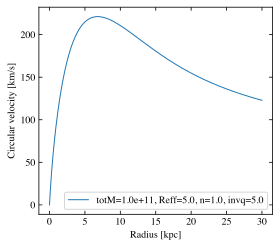

In [2]:
# Load & interpolate circular velocity profile
vc = spm.interpolate_sersic_profile_VC(R=R, total_mass=total_mass, Reff=Reff,
                                       n=n, invq=invq, path=table_dir)

# Make pseudo table & plot
table_gather = {'R': R, 'vcirc': vc, 'n': n, 'invq': invq, 'q': 1./invq, 
                    'total_mass': total_mass, 'Reff': Reff }


spm.plot.plot_vcirc(table_gather)

## Plot enclosed mass

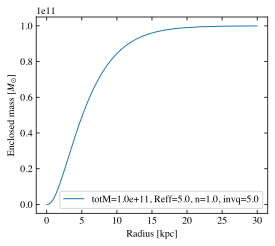

In [3]:
# Load & interpolate enclosed mass profile
menc = spm.interpolate_sersic_profile_menc(R=R, total_mass=total_mass, Reff=Reff,
                                           n=n, invq=invq, path=table_dir)

# Make pseudo table & plot
table_gather = {'R': R, 'menc3D_sph': menc, 'n': n, 'invq': invq, 'q': 1./invq, 
                    'total_mass': total_mass, 'Reff': Reff }

spm.plot.plot_enclosed_mass(table_gather)

## Plot all profiles for a table

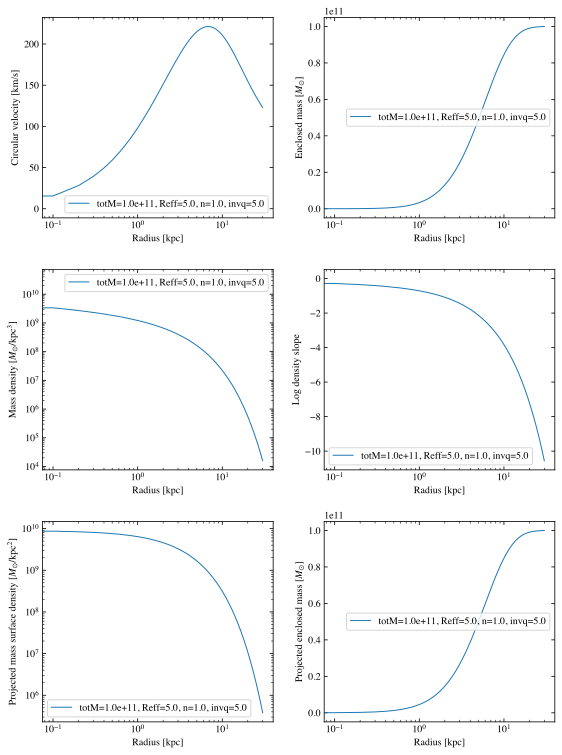

In [4]:
table = spm.interpolate_entire_table(R=R, total_mass=total_mass, Reff=Reff,
                                     n=n, invq=invq, path=table_dir)
    
# Plot all profiles in table
spm.plot.plot_profiles(table)

## Ploting multiple tables

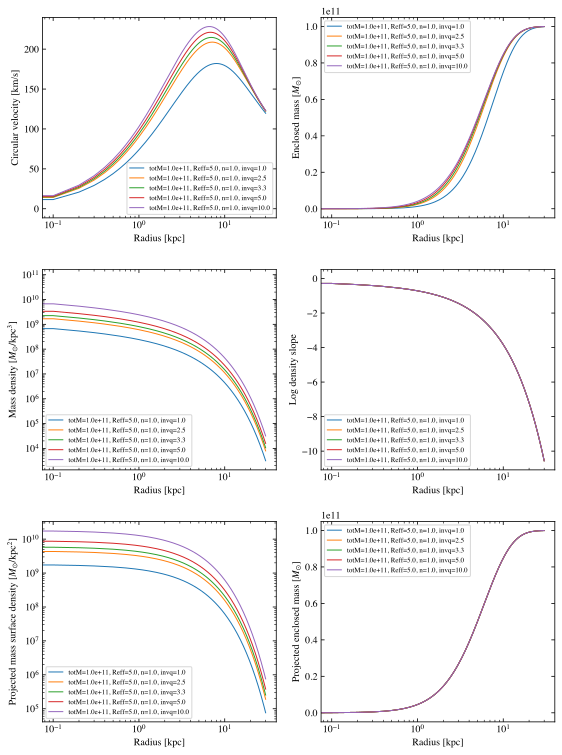

In [5]:
invq_arr = [1., 2.5, 3.33, 5., 10.]
tables = []
# Load & interpolate table for each n, invq
for invq in invq_arr:
    tables.append(spm.interpolate_entire_table(R=R, total_mass=total_mass, Reff=Reff,
                                               n=n, invq=invq, path=table_dir))
    
# Plot all profiles in tables
fig_kwargs = {'legend_fontsize': 7.}
spm.plot.plot_profiles(tables, fig_kwargs=fig_kwargs)

## Customization

It is also possible to plot subsets of the different profiles, and 
change the plotting settings (including `rlog`, `ylog`, `plot_kwargs`, and `fig_kwargs`).

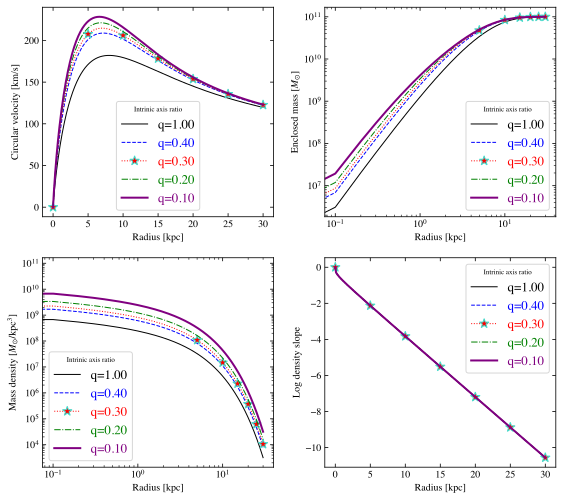

In [6]:
# Customize 
linestyles = ['-', '--', ':', '-.', '-']
colors = ['black', 'blue', 'red', 'green', 'purple']
lws = [1., 1., 1., 1., 2.]
markers = [None, None, '*', None, None]
markersizes = [None, None, 10, None, None]
markerfacecolors = [None, None, 'red', None, None]
markeredgecolors = [None, None, 'turquoise', None, None]
markeverys = [None, None, 50, None, None]
plot_kwargs = []
for i, invq in enumerate(invq_arr):
    # plot_kwargs can be a dictionary, or a list of dictionaries.
    # The keywords can include any keyword taken by matplotlib.pyplot.plot.
    plot_kwargs.append({'label': 'q={:0.2f}'.format(1./invq), 
                        'ls': linestyles[i], 
                        'color': colors[i], 
                        'lw': lws[i], 
                        'marker': markers[i], 
                        'ms': markersizes[i], 
                        'mfc': markerfacecolors[i], 
                        'mec': markeredgecolors[i],
                        'markevery': markeverys[i]})

# fig_kwargs contains a few odds and ends customizations.
# This includes any accepted keywords for plt.figure with 'figure_' prepended, 
# or any accepted keyword for matplotlib.axes.Axes.legend with 'legend_' prepended
fig_kwargs = {'figure_figsize': (8., 7.), 
              'legend_title': 'Intrinic axis ratio', 
              'legend_title_fontsize': 7., 
              'legend_fontsize': 13.,
              'legend_labelcolor': 'linecolor'}

spm.plot.plot_profiles(tables, 
                       prof_names=['v_circ', 'enclosed_mass', 'density', 'dlnrho_dlnR'],
                       rlog = [False, True, True, False], 
                       ylog = [False, True, True, False], 
                       plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)